### Задание:
Реализовать в python метод градиентного спуска для одной и двух переменных, как в примерах 
выше. Для примера 1 построить график сходимости. 
Реализовать метод наискорейшего спуска в python или WM.

### 1. Градиентный спуск для функции одной переменной

### 1.1. «Обычный» градиентный спуск с фиксированным шагом
- Задаём начальную точку x0
- Выбираем постоянный шаг α (learning rate).
- На каждом шаге вычисляем градиент (в одномерном случае это просто производная). f ′(x)=2x.
- Обновляем 𝑥_𝑛+1 = x_n − a⋅f ′(x_n)
- Повторяем, пока не достигнем критерия остановки (например, пока модуль приращения ∣x_n+1 − x_n∣ не станет достаточно малым)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Определим функцию и её производную
def f1(x):
    return x**2

def df1(x):
    return 2*x

In [3]:
# Параметры метода
alpha = 0.1       # Постоянная длина шага
x0 = 5.0          # Начальное приближение
tol = 1e-6        # Допуск (критерий остановки)
max_iter = 1000   # Максимальное число итераций

In [4]:
# Градиентный спуск
x_vals = [x0]  # Будем сохранять все x для построения графика
f_vals = [f1(x0)]

In [5]:
for i in range(max_iter):
    x_current = x_vals[-1]
    
    # Считаем новый x
    x_new = x_current - alpha * df1(x_current)
    
    # Сохраним
    x_vals.append(x_new)
    f_vals.append(f1(x_new))
    
    # Критерий остановки
    if abs(x_new - x_current) < tol:
        break

In [6]:
# Вывод результатов
print("Количество итераций:", len(x_vals)-1)
print("Минимум достигается в точке x =", x_vals[-1])
print("f(x) =", f_vals[-1])

Количество итераций: 63
Минимум достигается в точке x = 3.923188584616677e-06
f(x) = 1.539140867046661e-11


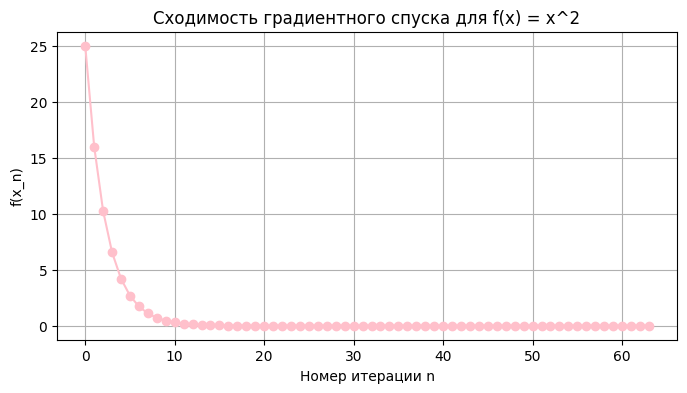

In [7]:
# Построим график f(x_n) в зависимости от n
plt.figure(figsize=(8, 4))
plt.plot(f_vals, marker='o', color='pink')
plt.title("Сходимость градиентного спуска для f(x) = x^2")
plt.xlabel("Номер итерации n")
plt.ylabel("f(x_n)")
plt.grid(True)
plt.show()

убывает и стремится к нулю

### 1.2. Метод наискорейшего (строчного) спуска в одномерном случае

In [8]:
import numpy as np

def f1(x):
    return x**2

def df1(x):
    return 2*x


In [9]:
# Метод наискорейшего спуска для f(x)=x^2
def steepest_descent_1d(x0, tol=1e-12, max_iter=100):
    x = x0
    for i in range(max_iter):
        grad = df1(x)
        # Если градиент близок к 0, можно остановиться
        if abs(grad) < tol:
            break
        # Для f(x) = x^2 оптимальный шаг всегда 1/2
        alpha = 0.5
        x_new = x - alpha * grad
        
        if abs(x_new - x) < tol:
            x = x_new
            break
        x = x_new
    return x

In [10]:
x_min = steepest_descent_1d(5.0)
print("Минимум:", x_min)
print("f(x_min) =", f1(x_min))

Минимум: 0.0
f(x_min) = 0.0


В одномерном случае такой метод с «точным» вычислением шага очень быстро приводит к решению.

### 2. Градиентный спуск для функции двух переменных

### 2.1. Обычный градиентный спуск с фиксированным шагом

- Начальное приближение (x0 ,y0).
- Фиксированный шаг a.
- На каждом шаге вычисляем градиент 

∇f(x,y)=( ∂x/∂f
         ∂y/∂f)

- Обновляем
- Повторяем до сходимости.

In [11]:
def f2(x, y):
    return 3*x**2 + 5*y**2

def grad_f2(x, y):
    return np.array([6*x, 10*y])

In [12]:
def gradient_descent_2d_fixed(alpha=0.01, x0=2.0, y0=3.0, tol=1e-6, max_iter=1000):
    x, y = x0, y0
    points = [(x, y)]  # для визуализации траектории
    
    for i in range(max_iter):
        g = grad_f2(x, y)
        
        # Делаем шаг
        x_new = x - alpha*g[0]
        y_new = y - alpha*g[1]
        
        # Проверяем сходимость
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            x, y = x_new, y_new
            points.append((x, y))
            break
        
        x, y = x_new, y_new
        points.append((x, y))
        
    return x, y, points

In [13]:
# Запуск
alpha = 0.1
x_min, y_min, pts = gradient_descent_2d_fixed(alpha=alpha, x0=2.0, y0=3.0)
print(f"Минимум при x = {x_min:.5f}, y = {y_min:.5f}")
print(f"Значение функции f(x,y) = {f2(x_min, y_min):.5e}")

Минимум при x = 0.00000, y = 0.00000
Значение функции f(x,y) = 3.54177e-13


Построим контурный график (contour plot) или 3D-график

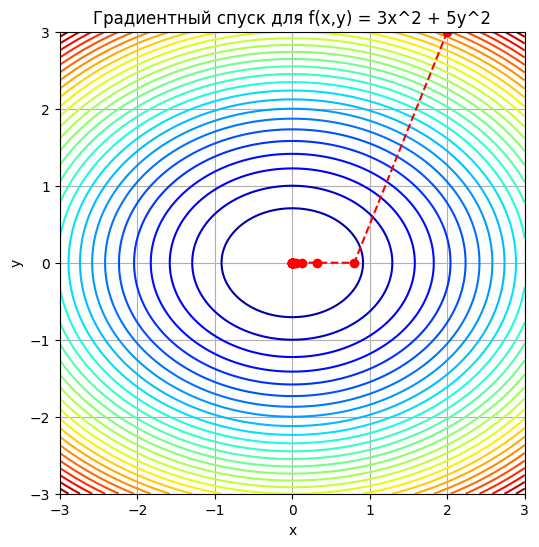

In [14]:
import matplotlib.pyplot as plt

# Построим линии уровня (contour plot) для f2(x,y)
X = np.linspace(-3, 3, 200)
Y = np.linspace(-3, 3, 200)
X_grid, Y_grid = np.meshgrid(X, Y)
Z = f2(X_grid, Y_grid)

plt.figure(figsize=(6, 6))
plt.contour(X_grid, Y_grid, Z, levels=30, cmap='jet')

# Нанесём траекторию градиентного спуска
pts_array = np.array(pts)
plt.plot(pts_array[:,0], pts_array[:,1], 'ro--')  # точки

plt.title("Градиентный спуск для f(x,y) = 3x^2 + 5y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### 2.2. Метод наискорейшего спуска (с линейным поиском) для двух переменных

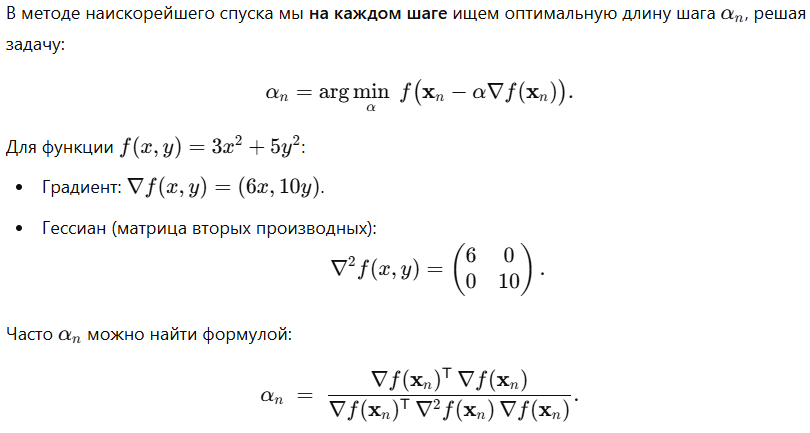

In [15]:
def f2(x, y):
    return 3*x**2 + 5*y**2

def grad_f2(x, y):
    return np.array([6*x, 10*y])

def line_search_2d(x, y):
    """
    Линейный поиск (точный) для f(x,y) = 3x^2 + 5y^2
    Возвращает оптимальную длину шага alpha.
    """
    g = grad_f2(x, y)
    # g = (6x, 10y)
    numerator = g[0]**2 + g[1]**2 * ( (6/6)**2) 
    # Но лучше аккуратно:
    # g^T g = (6x)^2 + (10y)^2
    # g^T H g = ...
    
    g_norm_sq = g[0]**2 + g[1]**2  # (6x)^2 + (10y)^2
    # Явно по формуле, приведённой выше:
    # g^T H g = 216 x^2 + 1000 y^2
    x2, y2 = x*x, y*y
    denom = 216*x2 + 1000*y2
    if denom == 0:
        return 0.0  # чтобы не делить на 0
    alpha = g_norm_sq / denom
    return alpha

In [16]:
def steepest_descent_2d(x0=2.0, y0=3.0, tol=1e-8, max_iter=1000):
    x, y = x0, y0
    points = [(x, y)]
    for i in range(max_iter):
        g = grad_f2(x, y)
        if np.linalg.norm(g) < tol:
            break
        
        # Ищем оптимальный шаг
        alpha = line_search_2d(x, y)
        
        # Делаем шаг
        x_new = x - alpha*g[0]
        y_new = y - alpha*g[1]
        
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            x, y = x_new, y_new
            points.append((x, y))
            break
        
        x, y = x_new, y_new
        points.append((x, y))
    
    return x, y, points

In [17]:
# Проверка
x_min, y_min, pts = steepest_descent_2d(x0=2.0, y0=3.0)
print(f"Минимум при x={x_min:.5f}, y={y_min:.5f}, f={f2(x_min,y_min):.5e}")

# Можно визуализировать, аналогично примеру с контурным графиком

Минимум при x=0.00000, y=-0.00000, f=1.24417e-18


In [18]:
from mpl_toolkits.mplot3d import Axes3D
# активируйте интерактивный режим:
%matplotlib notebook

# Определяем функцию
def f(x, y):
    return x**2 + 3*y**2

# Градиент функции
def grad_f(x, y):
    return np.array([2*x, 6*y])

# Линейный поиск (точный) для метода наискорейшего спуска
def line_search(x, y):
    """
    Возвращает оптимальную длину шага alpha
    для f(x, y) = x^2 + 3y^2.
    """
    g = grad_f(x, y)
    x2, y2 = x*x, y*y
    # Числитель: (2x)^2 + (6y)^2 = 4x^2 + 36y^2
    numerator = g[0]**2 + g[1]**2
    # Знаменатель: (2x,6y) * [[2,0],[0,6]] * (2x,6y)^T = 8x^2 + 216y^2
    denom = 8*x2 + 216*y2
    
    if denom == 0:
        return 0.0  # чтобы не было деления на 0 (когда уже в минимуме)
    return numerator / denom

In [19]:
# Метод наискорейшего спуска
def steepest_descent(x0, y0, tol=1e-8, max_iter=1000):
    """
    Возвращает (x_min, y_min, trajectory),
    где trajectory — список точек (x_n, y_n) на каждом шаге.
    """
    x, y = x0, y0
    trajectory = [(x, y)]
    
    for _ in range(max_iter):
        g = grad_f(x, y)
        if np.linalg.norm(g) < tol:
            break
        
        # Находим оптимальный шаг alpha
        alpha = line_search(x, y)
        
        # Делаем шаг
        x_new = x - alpha*g[0]
        y_new = y - alpha*g[1]
        
        # Проверка критерия остановки
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            x, y = x_new, y_new
            trajectory.append((x, y))
            break
        
        x, y = x_new, y_new
        trajectory.append((x, y))
    
    return x, y, trajectory

Найден минимум в точке (x=0.000000, y=-0.000000)
Значение функции f(x,y) = 5.935007e-18


<IPython.core.display.Javascript object>


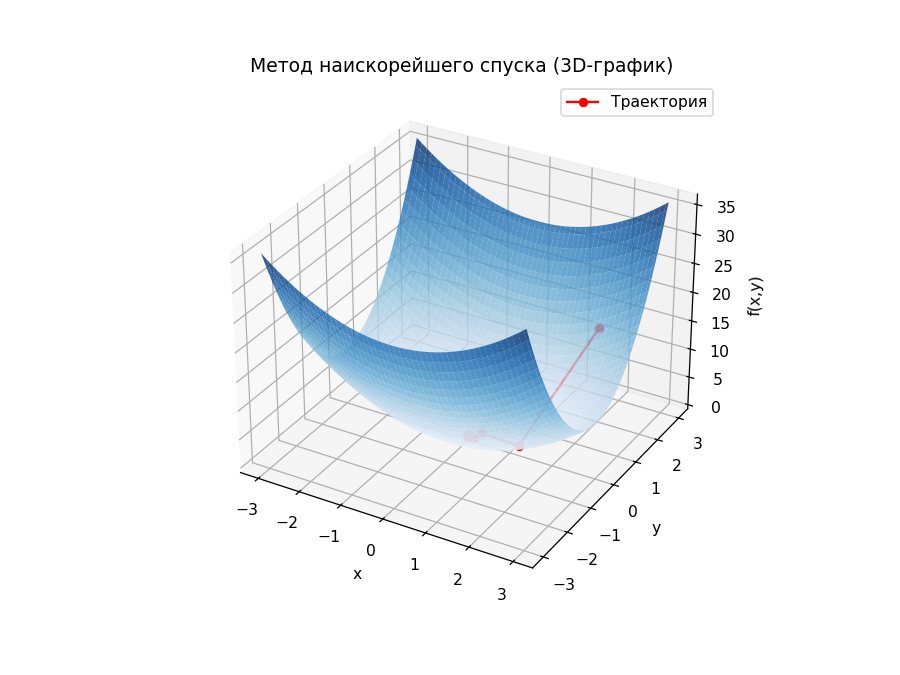

In [20]:
# -----------------------
# 3D-визуализация
# -----------------------
def plot_3d_trajectory(f, points, xlim=(-3,3), ylim=(-3,3)):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Создадим сетку для поверхности
    X = np.linspace(xlim[0], xlim[1], 100)
    Y = np.linspace(ylim[0], ylim[1], 100)
    X_grid, Y_grid = np.meshgrid(X, Y)
    Z_grid = f(X_grid, Y_grid)
    
    # Построение 3D-поверхности
    ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='Blues', alpha=0.8)
    
    # Траектория спуска
    pts = np.array(points)
    X_pts = pts[:, 0]
    Y_pts = pts[:, 1]
    Z_pts = f(X_pts, Y_pts)
    ax.plot(X_pts, Y_pts, Z_pts, color='r', marker='o', markersize=5, label='Траектория')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    plt.title("Метод наискорейшего спуска (3D-график)")
    plt.legend()
    plt.show()

# -----------------------
# Запуск и вывод результатов
# -----------------------
if __name__ == "__main__":
    # Начальная точка (x0, y0)
    x0, y0 = 2.0, 2.0
    
    x_min, y_min, trajectory = steepest_descent(x0, y0)
    
    print(f"Найден минимум в точке (x={x_min:.6f}, y={y_min:.6f})")
    print(f"Значение функции f(x,y) = {f(x_min, y_min):.6e}")
    
    # Строим 3D-график
    plot_3d_trajectory(f, trajectory, xlim=(-3,3), ylim=(-3,3))